In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import numpy as np 

In [2]:
cali = fetch_california_housing()

X = cali.data
y = cali.target

print(X.shape, y.shape)


(20640, 8) (20640,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #since the trained model is being saved, if this is on shuffle=True, it could lead to overfitting

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16512, 8) (16512,) (4128, 8) (4128,)


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

## Creating Pipeline, Training Model, and Saving Model

### No Need to ReTrain the data the if the .model files are generated once, skip the model blocks and run the next blocks

### Model: KNN

In [5]:
pipe_KNN = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', KNeighborsRegressor(weights='distance', n_neighbors=5))
    
])

pipe_KNN.fit(X_train, y_train)

joblib.dump(pipe_KNN, 'pipe_KNN.model')


['pipe_KNN.model']

### Model: LINEAR

In [6]:
pipe_Linear = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', LinearRegression())
])
pipe_Linear.fit(X_train, y_train)
joblib.dump(pipe_Linear, 'pipe_Linear.model')


['pipe_Linear.model']

### RANDOM FOREST REGRESSOR

In [7]:
pipe_RandomForestRegressor = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', RandomForestRegressor())
])
pipe_RandomForestRegressor.fit(X_train, y_train)
joblib.dump(pipe_RandomForestRegressor, 'pipe_RandomForestRegressor.model', compress=3)

['pipe_RandomForestRegressor.model']

### Model: GRADIENT BOOSTING REGRESSOR

In [8]:
pipe_GradientBoostingRegressor = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=10000)),
    ('model', GradientBoostingRegressor())
])
pipe_GradientBoostingRegressor.fit(X_train, y_train)
joblib.dump(pipe_GradientBoostingRegressor, 'pipe_GradientBoostingRegressor.model')


['pipe_GradientBoostingRegressor.model']

### Model: VOTING REGRESSOR

In [31]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[('Random', pipe_RandomForestRegressor), 
                                           ('Gradient', pipe_GradientBoostingRegressor)],
                               weights=[0.5, 0.5]
                              )
voting_model.fit(X_train, y_train)
joblib.dump(voting_model, 'voting_model.model', compress=3)

['voting_model.model']

### LOADING MODELS AND PREDICTING RESULTS

In [32]:
# Loading Models
pipe_KNN = joblib.load('pipe_KNN.model')
pipe_Linear = joblib.load('pipe_Linear.model')
pipe_GradientBoostingRegressor = joblib.load('pipe_GradientBoostingRegressor.model')
pipe_RandomForestRegressor = joblib.load('pipe_RandomForestRegressor.model')
voting_model = joblib.load('voting_model.model')

# Predicting Y
pred_KNN = pipe_KNN.predict(X_test)
pred_Linear = pipe_Linear.predict(X_test)
pred_GradientBoostingRegressor = pipe_GradientBoostingRegressor.predict(X_test)
pred_RandomForestRegressor = pipe_RandomForestRegressor.predict(X_test)
pred_Voting = voting_model.predict(X_test)

### PLOTING THE PREDICTION OF MODEL

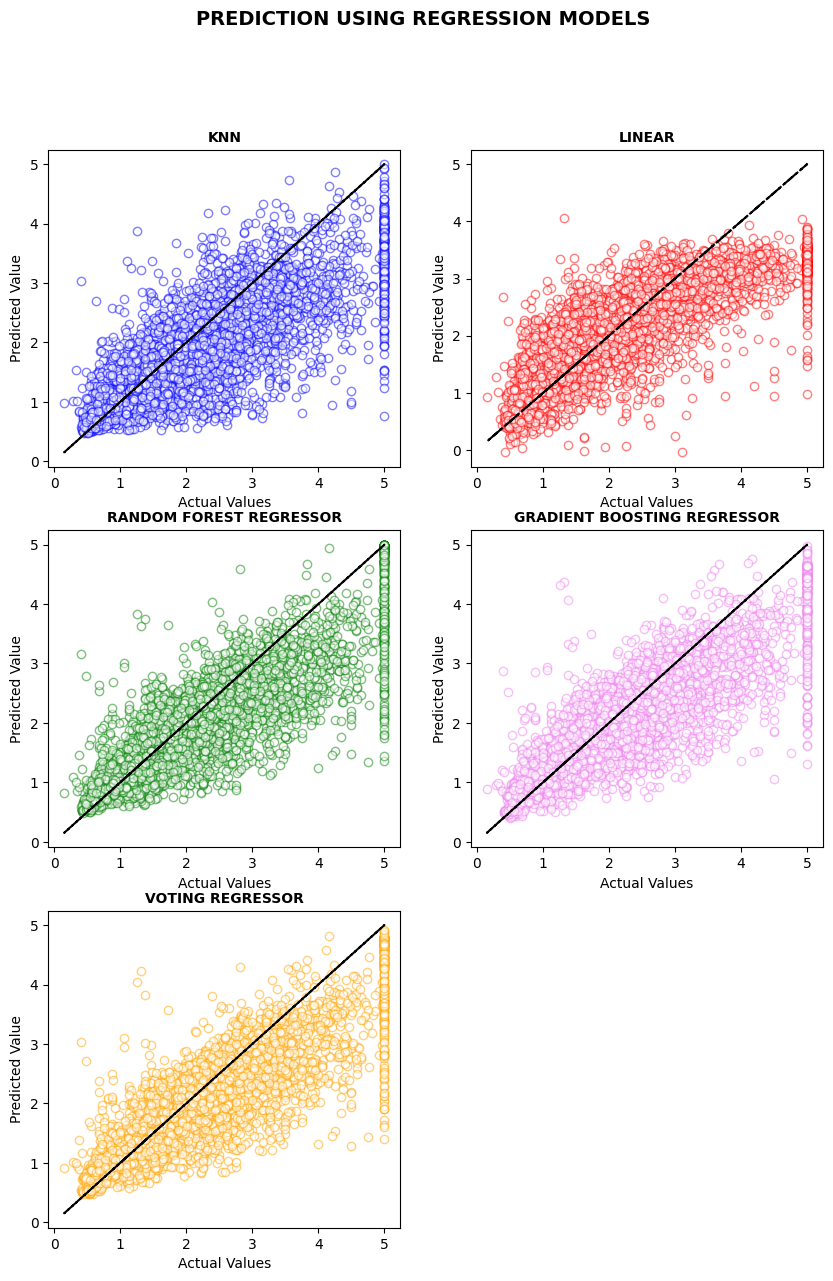

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 14))

plt.subplot(3,2,1)
plt.scatter(y_test, pred_KNN, c='white', alpha=0.5, edgecolors='blue') 
plt.plot(y_test, y_test, ls='-.', c='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value') 
plt.title("KNN",fontweight='bold',fontsize=10)

plt.subplot(3,2,2)
plt.scatter(y_test, pred_Linear, c='white', alpha=0.5, edgecolors='red')
plt.plot(y_test, y_test, ls='-.', c='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value') 
plt.title("LINEAR",fontweight='bold',fontsize=10)

plt.subplot(3,2,3)
plt.scatter(y_test, pred_RandomForestRegressor, alpha=0.5, c='w', edgecolors='g')
plt.plot(y_test, y_test, ls='-.', c='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value') 
plt.title("RANDOM FOREST REGRESSOR",fontweight='bold',fontsize=10)

plt.subplot(3,2,4)
plt.scatter(y_test, pred_GradientBoostingRegressor, alpha=0.5, c='w', edgecolors='violet')
plt.plot(y_test, y_test, c='black', ls='-.')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value') 
plt.title("GRADIENT BOOSTING REGRESSOR",fontweight='bold', fontsize=10)

plt.subplot(3,2,5)
plt.scatter(y_test, pred_Voting, alpha=0.5, c='w', edgecolors='orange')
plt.plot(y_test, y_test, c='black', ls='-.')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value') 
plt.title("VOTING REGRESSOR",fontweight='bold', fontsize=10)

plt.suptitle('PREDICTION USING REGRESSION MODELS', fontweight='bold', fontsize=14)

plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mape_KNN = mean_absolute_percentage_error(y_test, pred_KNN)
mape_Linear = mean_absolute_percentage_error(y_test, pred_Linear)
mape_RandomForestRegressor = mean_absolute_percentage_error(y_test, pred_RandomForestRegressor)
mape_GradientBoostingRegressor = mean_absolute_percentage_error(y_test, pred_GradientBoostingRegressor) 
mape_Voting = mean_absolute_percentage_error(y_test, pred_Voting) 

mse_KNN = mean_squared_error(y_test, pred_KNN)
mse_Linear = mean_squared_error(y_test, pred_Linear)
mse_RandomForestRegressor = mean_squared_error(y_test, pred_RandomForestRegressor)
mse_GradientBoostingRegressor = mean_squared_error(y_test, pred_GradientBoostingRegressor) 
mse_Voting = mean_squared_error(y_test, pred_Voting) 


print("MEAN ABSOULUTE PERCENTAGE ERROR")

print(f"KNN: {mape_KNN:0.3f}, LINEAR: {mape_Linear:0.3f}, RandomForestRegressor: {mape_RandomForestRegressor:0.3f},  GradientBoostingRegressor: {mape_GradientBoostingRegressor:0.3f}")

print("\nMEAN SQUARED ERROR")
print(f"KNN: {mse_KNN:0.3f}, LINEAR: {mse_Linear:0.3f}, RandomForestRegressor: {mse_RandomForestRegressor:0.3f},  GradientBoostingRegressor: {mse_GradientBoostingRegressor:0.3f}")

MEAN ABSOULUTE PERCENTAGE ERROR
KNN: 0.275, LINEAR: 0.297, RandomForestRegressor: 0.224,  GradientBoostingRegressor: 0.232

MEAN SQUARED ERROR
KNN: 0.694, LINEAR: 0.593, RandomForestRegressor: 0.462,  GradientBoostingRegressor: 0.469


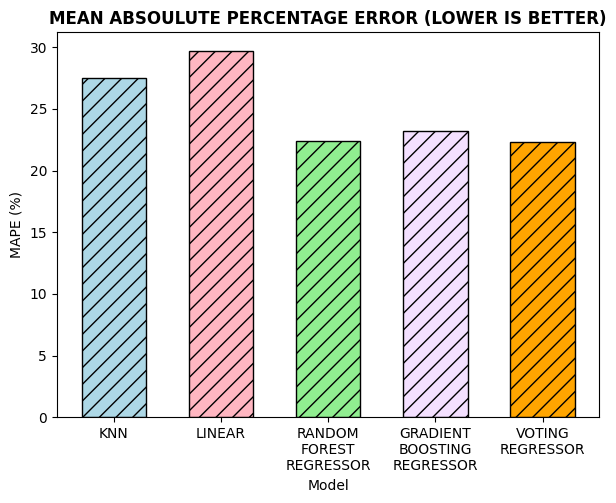

In [35]:
plt.figure(figsize=(7, 5))
bars=plt.bar(
    ['KNN', 'LINEAR', 'RANDOM\nFOREST\nREGRESSOR', 'GRADIENT\nBOOSTING\nREGRESSOR', 'VOTING\nREGRESSOR'], 
    [mape_KNN*100, mape_Linear*100, mape_RandomForestRegressor*100, mape_GradientBoostingRegressor*100, mape_Voting*100],
    color=['#ADD8E6', '#FFB6C1', '#90EE90', '#f4e0ff', 'orange'],
    edgecolor='black', width=0.6
)

for bar in bars:
    bar.set_hatch('//')


plt.xlabel('Model')
plt.ylabel('MAPE (%)')

plt.title('MEAN ABSOULUTE PERCENTAGE ERROR (LOWER IS BETTER)', fontweight='bold', fontsize=12)
plt.show()


In [36]:
final_data = {'KNN':pred_KNN, 
              'LINEAR': pred_Linear,
              'RANDOM_FOREST_REGRESSOR': pred_RandomForestRegressor,
              'GRADIENT_BOOSTING_REGRESSOR': pred_GradientBoostingRegressor,
              'VOTING_REGRESSOR': pred_Voting,
              'Actual': y_test
             }

pd.DataFrame(final_data)



,KNN,LINEAR,RANDOM_FOREST_REGRESSOR,GRADIENT_BOOSTING_REGRESSOR,VOTING_REGRESSOR,Actual
0,0.645778,1.080538,1.10683,0.996221,1.061232,1.656
1,1.071923,1.467357,1.30802,1.310277,1.354173,1.261
2,0.719968,0.832301,0.83144,0.956767,0.904120,0.944
3,0.703748,1.237157,0.91204,1.100504,1.034425,0.919
4,1.016114,1.146196,1.19881,1.095871,1.132847,1.243
...,...,...,...,...,...,...
4123,0.904884,0.546326,0.72610,0.670811,0.662370,0.781
4124,1.237602,0.579917,0.88731,0.925563,0.926970,0.771
4125,0.698664,0.609240,0.86185,0.759086,0.791784,0.923
4126,0.896325,0.799494,0.91719,0.841106,0.837630,0.847


In [37]:
comparision_df = {'Models': ['KNN REGRESSOR', 'LINEAR REGRESSOR', 'RANDOM FOREST REGRESSOR', 'GRADIENT BOOSTING REGRESSOR', 'VOTING REGRESSOR'],
                 'MAPE':[mape_KNN, mape_Linear, mape_RandomForestRegressor, mape_GradientBoostingRegressor, mape_Voting],
                 'MSE':[mse_KNN, mse_Linear, mse_RandomForestRegressor, mse_GradientBoostingRegressor, mse_Voting]
                 }


pd.DataFrame(comparision_df)

,Models,MAPE,MSE
0,KNN REGRESSOR,0.274974,0.693711
1,LINEAR REGRESSOR,0.297186,0.592571
2,RANDOM FOREST REGRESSOR,0.223631,0.462264
3,GRADIENT BOOSTING REGRESSOR,0.232123,0.469491
4,VOTING REGRESSOR,0.223423,0.454630
